In [ ]:
#instalar bibilioteca de efeitos estéticos
!pip install mplcyberpunk

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import datetime
import mplcyberpunk #Biblioteca para alguns efeitos estético dos gráficos, caso não possua pode dar erros ao rodar essa célula, logo, exclua esta linha se for o caso.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

<h2>OBS: TODAS SÉRIES TEMPORAIS ESTÃO EM PERIDIOCIDADE MENSAL

<h1>1) Série crimes letais (ocorrências de homicídio doloso + ocorrência de latrocínio) na cidade de SP

In [6]:
monthly_occurrences = pd.read_csv("inputs/monthly_occurrences_policiaSP.csv")

SaoPaulo_letal_crimes = monthly_occurrences\
                        .loc[(monthly_occurrences.Cidade=="São Paulo") & (monthly_occurrences.Ano<=2018) & ((monthly_occurrences.Natureza=="HOMICÍDIO DOLOSO (2)") | (monthly_occurrences.Natureza=="LATROCÍNIO"))]\
                        .reset_index(drop=True)\
                        .iloc[::-1]\
                        .reset_index(drop=True)\
                        .drop(columns=["Total","Regiao", "Cidade"])

crimesLetais_HomicidioDoloso_mais_Latrocinio = []
j = 1
i = 0
v1 = 0
v2 = 0
while i < 36:
    
    while j < 13:
        v1 = SaoPaulo_letal_crimes.iloc[i,j]
        v2 = SaoPaulo_letal_crimes.iloc[i+1,j]
        crimesLetais_HomicidioDoloso_mais_Latrocinio.append(v1+v2)
        j += 1
    j = 1   
    i = i + 2
    v1 = 0
    v2 = 0

#salvo para formato excel, onde editei para ter indices com mes e ano
# pd.DataFrame(crimesLetais_HomicidioDoloso_mais_Latrocinio).to_excel("crimes letais cidade de sp.xlsx")
#quando iloc é iloc[::-1], dataframe terá ordem mudada, ultima linha se torna primeira e primeira se torna ultima


In [4]:
crimesLetais_SP = pd.read_excel("crimes letais cidade de sp.xlsx", index_col="Data")
                           
crimesLetais_SP

,Crimes Letais
Data,
2001-01-01,494
2001-02-01,461
2001-03-01,462
2001-04-01,491
2001-05-01,484
...,...
2018-08-01,57
2018-09-01,58
2018-10-01,64


<h1>2) Série de taxa de desemprego na cidade de SP

In [17]:
unemployment_rate_serie = pd.read_csv("inputs/desemprego_serie.csv", parse_dates=["Data"])
# unemployment_rate_serie.to_csv("desemprego_serie.csv")
unemployment_rate_serie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          216 non-null    int64         
 1   Data                216 non-null    datetime64[ns]
 2   Taxa de desemprego  216 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 5.2 KB


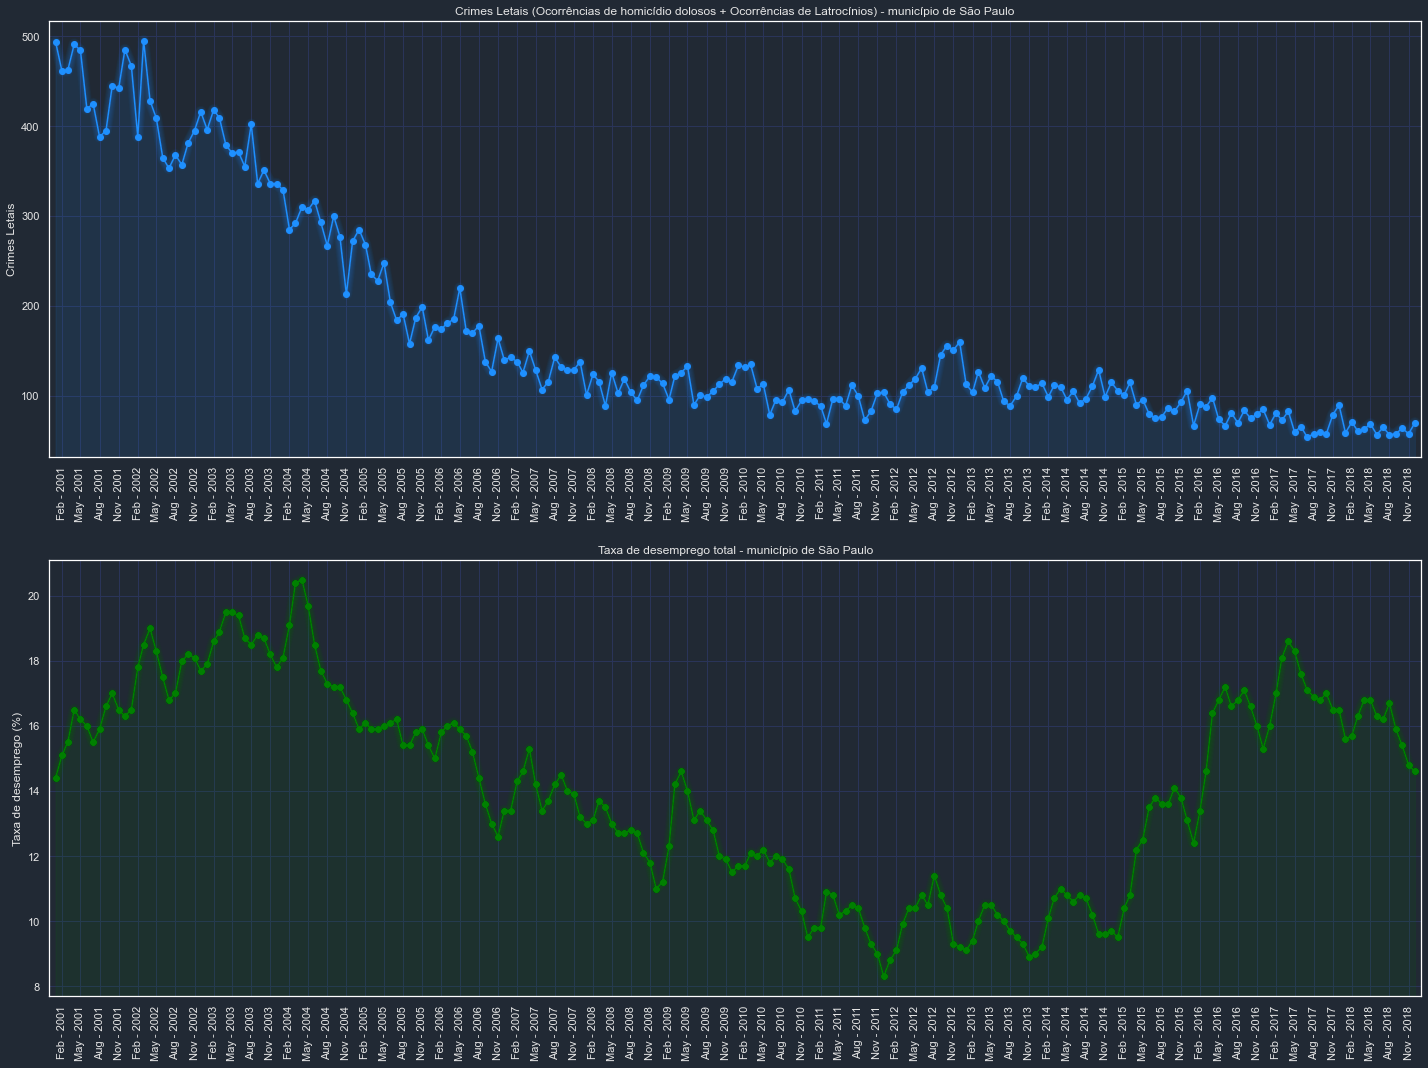

In [180]:
sns.set_context("notebook")
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20,15))

for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212934'  # bluish dark grey

for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
    plt.gca().grid(color='#2A3459')

date_format = mdates.DateFormatter("%b - %Y")  
#Ploto o primeiro gráfico da linha 1 coluna 1
ax1.plot_date(x=crimesLetais_SP.index,y="Crimes Letais", data=crimesLetais_SP, linestyle="solid", color="dodgerblue")
ax1.grid(color='#2A3459')
ax1.set(ylabel="Crimes Letais",title="Crimes Letais (Ocorrências de homicídio dolosos + Ocorrências de Latrocínios) - município de São Paulo")
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(date_format)
mplcyberpunk.add_glow_effects(ax=ax1)
ax1.set_xlim(['2000-12-01','2019-01-01'])

# #Ploto o segundo gráfico da linha 2 coluna 1
ax2.plot_date(x="Data", y="Taxa de desemprego", data=unemployment_rate_serie, linestyle="solid", color="green")
ax2.grid(color='#2A3459')
ax2.set(ylabel="Taxa de desemprego (%)",title="Taxa de desemprego total - município de São Paulo")
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax2.xaxis.set_major_formatter(date_format)
ax2.set_xlim(['2000-12-01','2019-01-01'])
mplcyberpunk.add_glow_effects(ax=ax2)


#Para todos os gráficos giro os valores do eixo X, que são as datas, em 90 graus para melhor visualização
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

#Aumento espaço entre os gráficos na horizontal
fig.tight_layout(h_pad=2)

<h4> Para plotar séries mensais de diferente anos, basta criar um pivot table com pandas de acordo com o código abaixo. Com a série temporal crimesLetais_SP, a pivot table separa-a em colunas de anos, em que as linhas são os meses que estão sendo mostrados em número do mês. Portanto, cada célula é uma observação de crimes letais (soma de ocorrências de homicídio dolosos e ocorrência de latrocínios) para um dado ano e mês

In [236]:
pv_crimes = pd.pivot_table(crimesLetais_SP, index = crimesLetais_SP.index.month,
                           columns=crimesLetais_SP.index.year,
                          values="Crimes Letais")

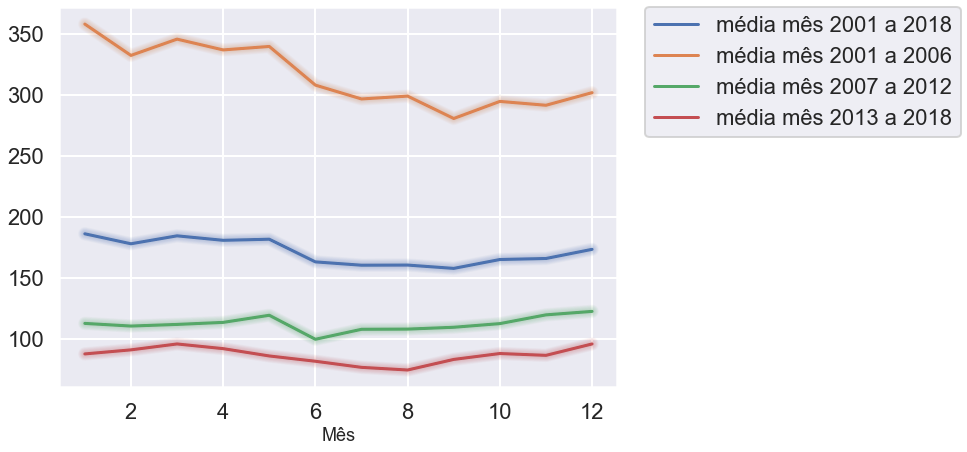

In [237]:
sns.set_theme(style="darkgrid")
sns.set_context("poster")

pv_crimes.mean(axis=1).plot(label="média mês 2001 a 2018")

pv_crimes.iloc[:, 0:6].mean(axis=1).plot(label="média mês 2001 a 2006")

pv_crimes.iloc[:, 6:12].mean(axis=1).plot(label="média mês 2007 a 2012")

pv_crimes.iloc[:, 12:].mean(axis=1).plot(label="média mês 2013 a 2018", figsize=(10,7))

plt.xlabel('Mês', fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


mplcyberpunk.make_lines_glow()

<AxesSubplot:xlabel='Data'>

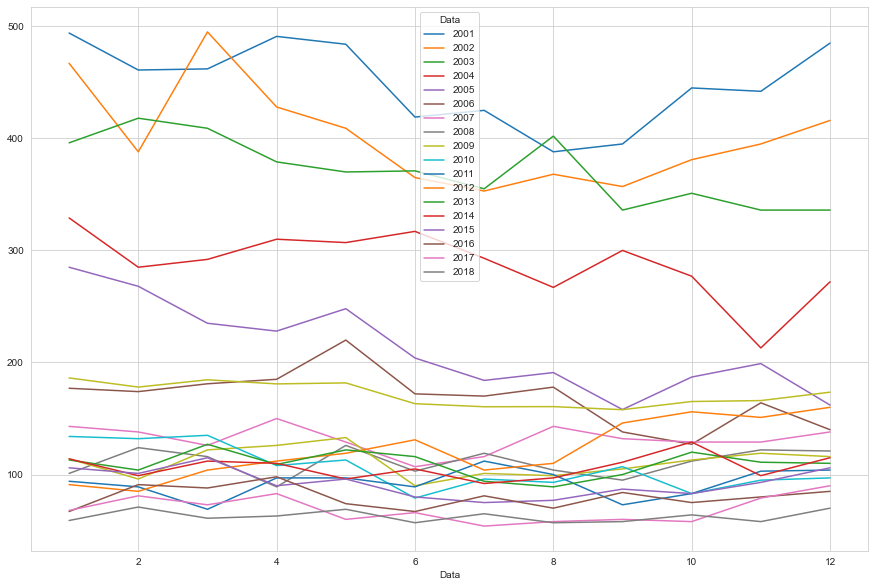

In [63]:
sns.set_style("whitegrid")
pv_crimes.plot(figsize=(15,10))
pv_crimes.mean(axis=1).plot()

<h1> 3) Série de produtividade policial (ocorrências de tráfico de entorpecente/prisões efetuadas)

In [ ]:
policeProductivity = pd.read_csv("inputs/PolicyProductivity_policiaSP.csv")

SaoPaulo_policeProductivity = policeProductivity.loc[(policeProductivity.Cidade=="São Paulo") & 
                                                    (policeProductivity.Ano<=2018) & 
                                                    ((policeProductivity.Natureza=="OCORRÊNCIAS DE TRÁFICO DE ENTORPECENTES") |
                                                    (policeProductivity.Natureza=="Nº DE PRISÕES EFETUADAS"))] \
                                                    .reset_index(drop=True) \
                                                    .iloc[::-1]\
                                                    .reset_index(drop=True) \
                                                    .drop(columns=["Total","Regiao", "Cidade"])

produtividadePolicial_razaoPrisoesEfetuadas_OcorrenciasTrafico = []
j = 1
i = 0
v1 = 0
v2 = 0
while i < 36:
    
    while j < 13:
        v1 = SaoPaulo_policeProductivity.iloc[i+1,j]
        v2 = SaoPaulo_policeProductivity.iloc[i,j]
        produtividadePolicial_razaoPrisoesEfetuadas_OcorrenciasTrafico.append(v1/v2)
        j += 1
   
    j = 1   
    i = i + 2
    v1 = 0
    v2 = 0

In [290]:
produtividadePolicial_SP = pd.DataFrame({"ocorr. de trafico/prisoes totais": produtividadePolicial_razaoPrisoesEfetuadas_OcorrenciasTrafico},
                                       index=pd.date_range(start='1/1/2001', periods=216, freq='M'))



,ocorr. de trafico/prisoes totais
2001-01-31,0.047495
2001-02-28,0.045226
2001-03-31,0.053241
2001-04-30,0.044383
2001-05-31,0.051237
...,...
2018-08-31,0.268914
2018-09-30,0.266970
2018-10-31,0.241379
2018-11-30,0.217845


<h1> 4) Série de Rendimento Médio Real dos ocupados na cidade de SP

In [3]:
avg_workers_wage = pd.read_excel("inputs/rendimento_real_médio_dos_ocupados.xlsx", sheet_name="Tab46")
avg_workers_wage.drop("Unnamed: 0", axis="columns", inplace=True)

salario_medio_real_lista = []
j = 1
i = 0
while i < len(avg_workers_wage.iloc[:,0]):
    
    while j < 13:
        salario_medio_real_lista.append(avg_workers_wage.iloc[i,j])
        j += 1
    j = 1   
    i += 1

In [4]:
salarioMedioReal_SP = pd.DataFrame({"Salário Médio Real": salario_medio_real_lista},
                                  index = pd.date_range(start='1/1/2001', periods=216, freq='M'))

salarioMedioReal_SP.to_excel("rendimento mensal serie.xlsx")

<AxesSubplot:>

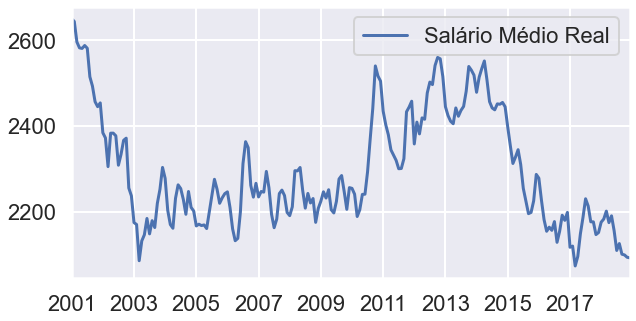

In [306]:
sns.set_context("poster")
salarioMedioReal_SP.plot(figsize=(10,5))